# introductory text (explain: dataset, task)

I am using a data set that gives information about students studying at a university. The data set provides demographic information as well as social economic and performance data. Given this data the goal is to predict whether a student will drop out or graduate. This is a binary classification problem where there are many features but only two classifications (Dropout or Graduate). I modified the data to exclude students that were classified as enrolled because I only wanted to focus on if a student would drop out or not.   

# import requisite modules

In [17]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from itertools import combinations
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy import stats
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

# helper functions (if necessary)

In [18]:
def plotCatorgical(columnName):
    dropout = dfNoEnrolled.loc[dfNoEnrolled['Target'] == 'Dropout']
    grad = dfNoEnrolled.loc[dfNoEnrolled['Target'] == 'Graduate']

    column = df[columnName]

    labels = column.unique()
    labels = sorted(labels)

    #total = dfNoEnrolled.shape[0]
    totalDrop = dropout.shape[0]
    totalGrad = grad.shape[0]

    dropGraph = []
    gradGraph = []
    for i in labels:
        dropi = np.count_nonzero( dropout[columnName] == i)
        gradi = np.count_nonzero( grad[columnName] == i)
        dropGraph.append(dropi/totalDrop)
        gradGraph.append(gradi/totalGrad)
        
    width = 0.3
    plt.bar(np.arange(len(dropGraph)), dropGraph, width=width, label = 'Dropout')
    plt.bar(np.arange(len(gradGraph))+ width, gradGraph, width=width, label = 'Graduate')
    plt.legend()
    plt.xticks(range(len(gradGraph)), labels)
    plt.xlabel(columnName)
    plt.ylabel("Percentage")
    plt.title("Percentage of Education Status based on " + columnName)
    plt.show()

def scatterPlot(col1, col2):
    sem1enrolledDrop = dropout[col1] 
    sem1enrolledGrad = grad[col1] 
    sem1creditedDrop = dropout[col2] 
    sem1creditedGrad = grad[col2] 
    plt.scatter(sem1enrolledDrop, sem1creditedDrop, label = 'Dropout',marker = '^')
    plt.scatter(sem1enrolledGrad, sem1creditedGrad, label = 'Graduate', marker ='.')
    plt.legend()
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title(col1 + " vs " + col2)
    plt.show()


def gradeGraph(colName):
    gradeDrop = dropout[colName]
    gradeGrad = grad[colName]
    
    minGrade = min(dfNoEnrolled[colName])
    maxGrade = max(dfNoEnrolled[colName])
    meanGrade = np.mean(dfNoEnrolled[colName])
    stdGrade = np.std(dfNoEnrolled[colName])
    print("Min " +  colName + ": " + str(minGrade))
    print("Max " +  colName + ": " + str(maxGrade))
    print("Mean " +  colName + ": " + str(meanGrade))
    print("STD of " +  colName + ": " + str(stdGrade))
    
    bins = [-.5,5,10,15,20]
    out1 =pd.cut(gradeDrop, bins = bins)
    out2 = pd.cut(gradeGrad, bins = bins)

    dropGrade = out1.value_counts().sort_index()/ gradeDrop.shape[0]
    gradGrade = out2.value_counts().sort_index()/ gradeGrad.shape[0]

    widith = 0.3
    plt.bar(np.arange(len(dropGrade.index)), dropGrade, width = widith, label = 'Dropout')
    plt.bar(np.arange(len(gradGrade.index)) + widith, gradGrade, width = widith, label = 'Graduate')
    plt.xticks(range(len(gradGrade.index)), gradGrade.index)
    plt.legend()
    plt.xlabel('Grade Bins')
    plt.ylabel("Percentage")
    plt.title("Percentage of Education Status based on " + colName )
    plt.show()

# pre-process, analyze dataset

In [19]:
df = pd.read_csv("dataset.csv")
dfNoEnrolled = df.drop(df.index[df['Target'] == 'Enrolled'])
y = dfNoEnrolled['Target']
dftrain = dfNoEnrolled.drop(columns = 'Target')
dropout = dfNoEnrolled.loc[dfNoEnrolled['Target'] == 'Dropout']
grad = dfNoEnrolled.loc[dfNoEnrolled['Target'] == 'Graduate']

numDf = dfNoEnrolled.copy()
numDf['Target'].replace(['Dropout','Graduate'], [0,1], inplace = True)
yCorr = numDf['Target'] 
cols = list(dftrain)
print('Correlation between Features and Target')
for c in cols:
    corr = np.corrcoef(yCorr,numDf[c])
    print(c + ":  %.2f" %(corr[0][1]))

print('\n Correlation bewteen Features')
combos = combinations(cols,2)
for c in combos:
    c1 = dftrain[c[0]]
    c2 = dftrain[c[1]]
    corr = np.corrcoef(c1,c2)
    if(corr[0][1] > .5):
        print(str(c[0]) + " " + str(c[1]) + ": % .2f " % (corr[0][1]))


Correlation between Features and Target
Marital status:  -0.10
Application mode:  -0.23
Application order:  0.09
Course:  0.01
Daytime/evening attendance:  0.08
Previous qualification:  -0.10
Nacionality:  -0.00
Mothers qualification:  -0.05
Fathers qualification:  -0.00
Mothers occupation:  0.06
Fathers occupation:  0.07
Displaced:  0.13
Educational special needs:  -0.01
Debtor:  -0.27
Tuition fees up to date:  0.44
Gender:  -0.25
Scholarship holder:  0.31
Age at enrollment:  -0.27
International:  0.01
Curricular units 1st sem (credited):  0.05
Curricular units 1st sem (enrolled):  0.16
Curricular units 1st sem (evaluations):  0.06
Curricular units 1st sem (approved):  0.55
Curricular units 1st sem (grade):  0.52
Curricular units 1st sem (without evaluations):  -0.07
Curricular units 2nd sem (credited):  0.05
Curricular units 2nd sem (enrolled):  0.18
Curricular units 2nd sem (evaluations):  0.12
Curricular units 2nd sem (approved):  0.65
Curricular units 2nd sem (grade):  0.61
Curric

# visualize dataset

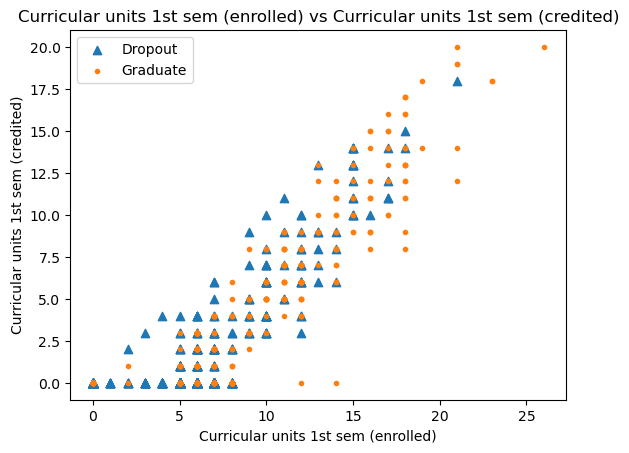

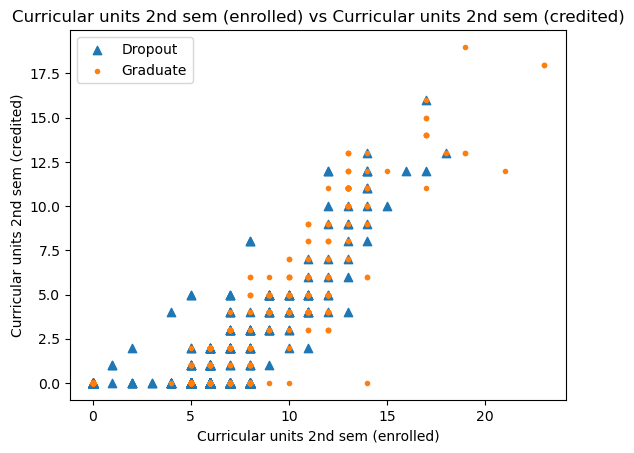

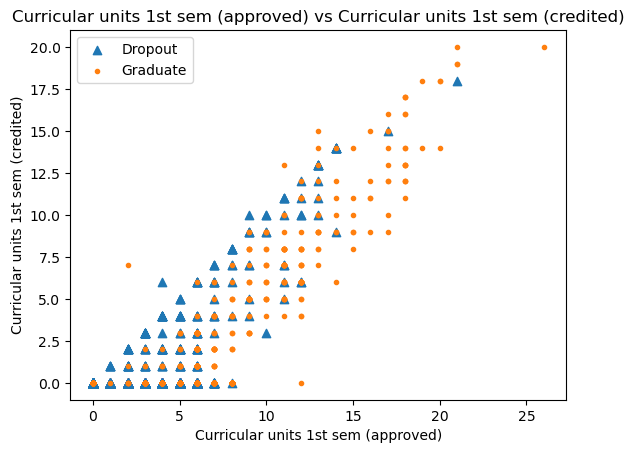

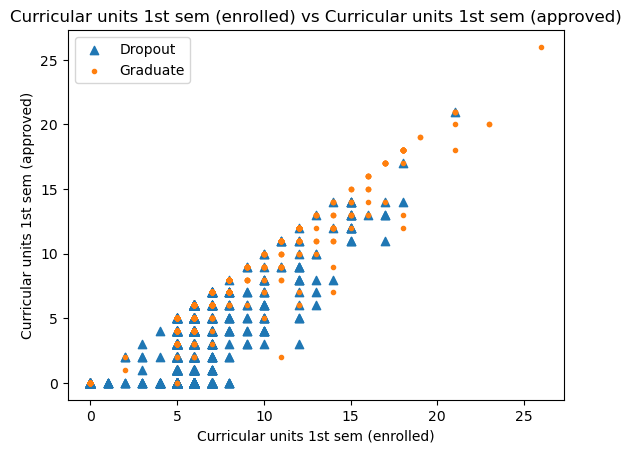

Min Curricular units 1st sem (grade): 0.0
Max Curricular units 1st sem (grade): 18.875
Mean Curricular units 1st sem (grade): 10.534859606019284
STD of Curricular units 1st sem (grade): 5.056997256871883


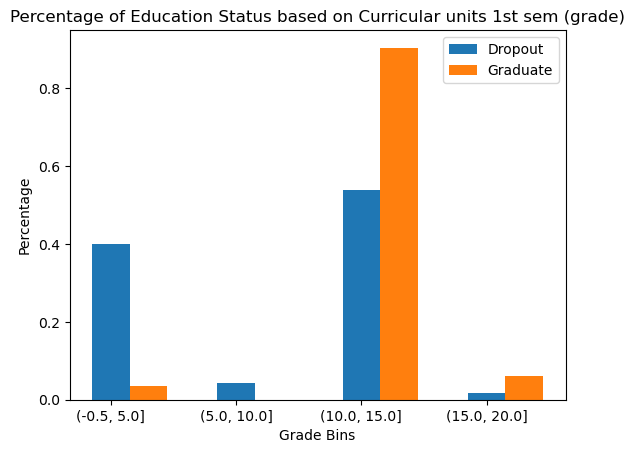

Min Curricular units 2nd sem (grade): 0.0
Max Curricular units 2nd sem (grade): 18.57142857
Mean Curricular units 2nd sem (grade): 10.036155051528926
STD of Curricular units 2nd sem (grade): 5.480986969495602


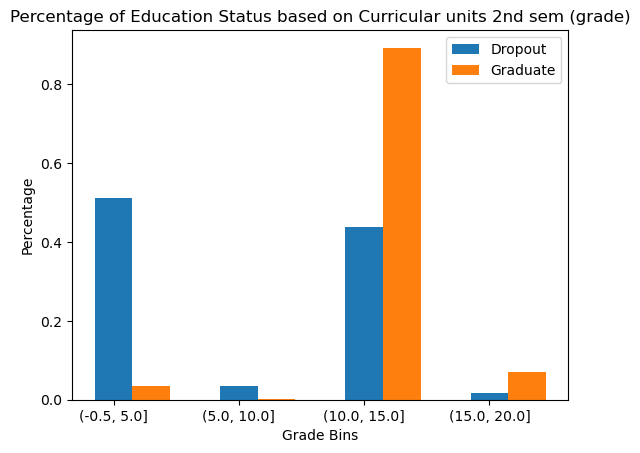

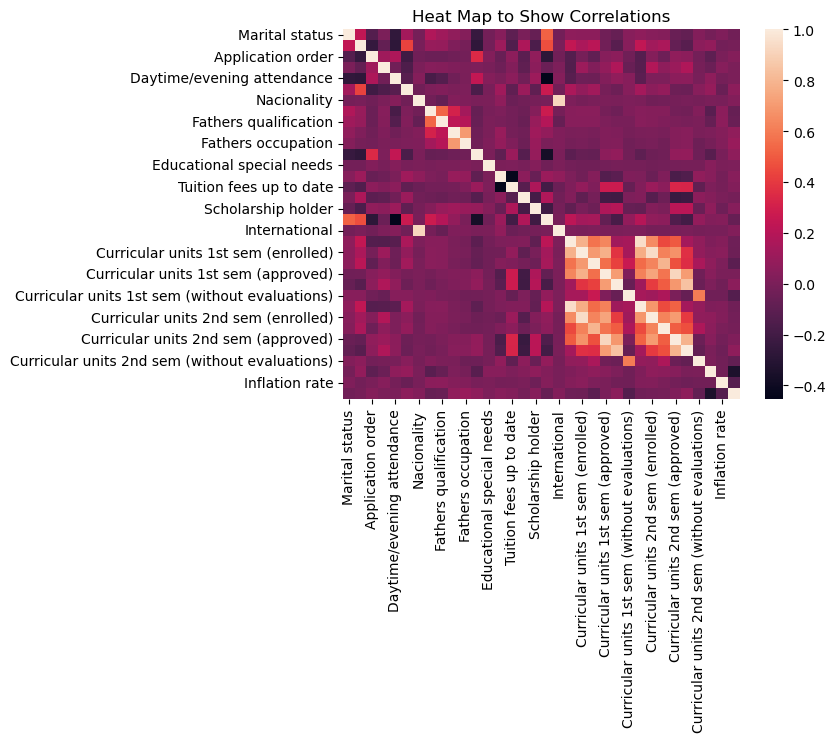

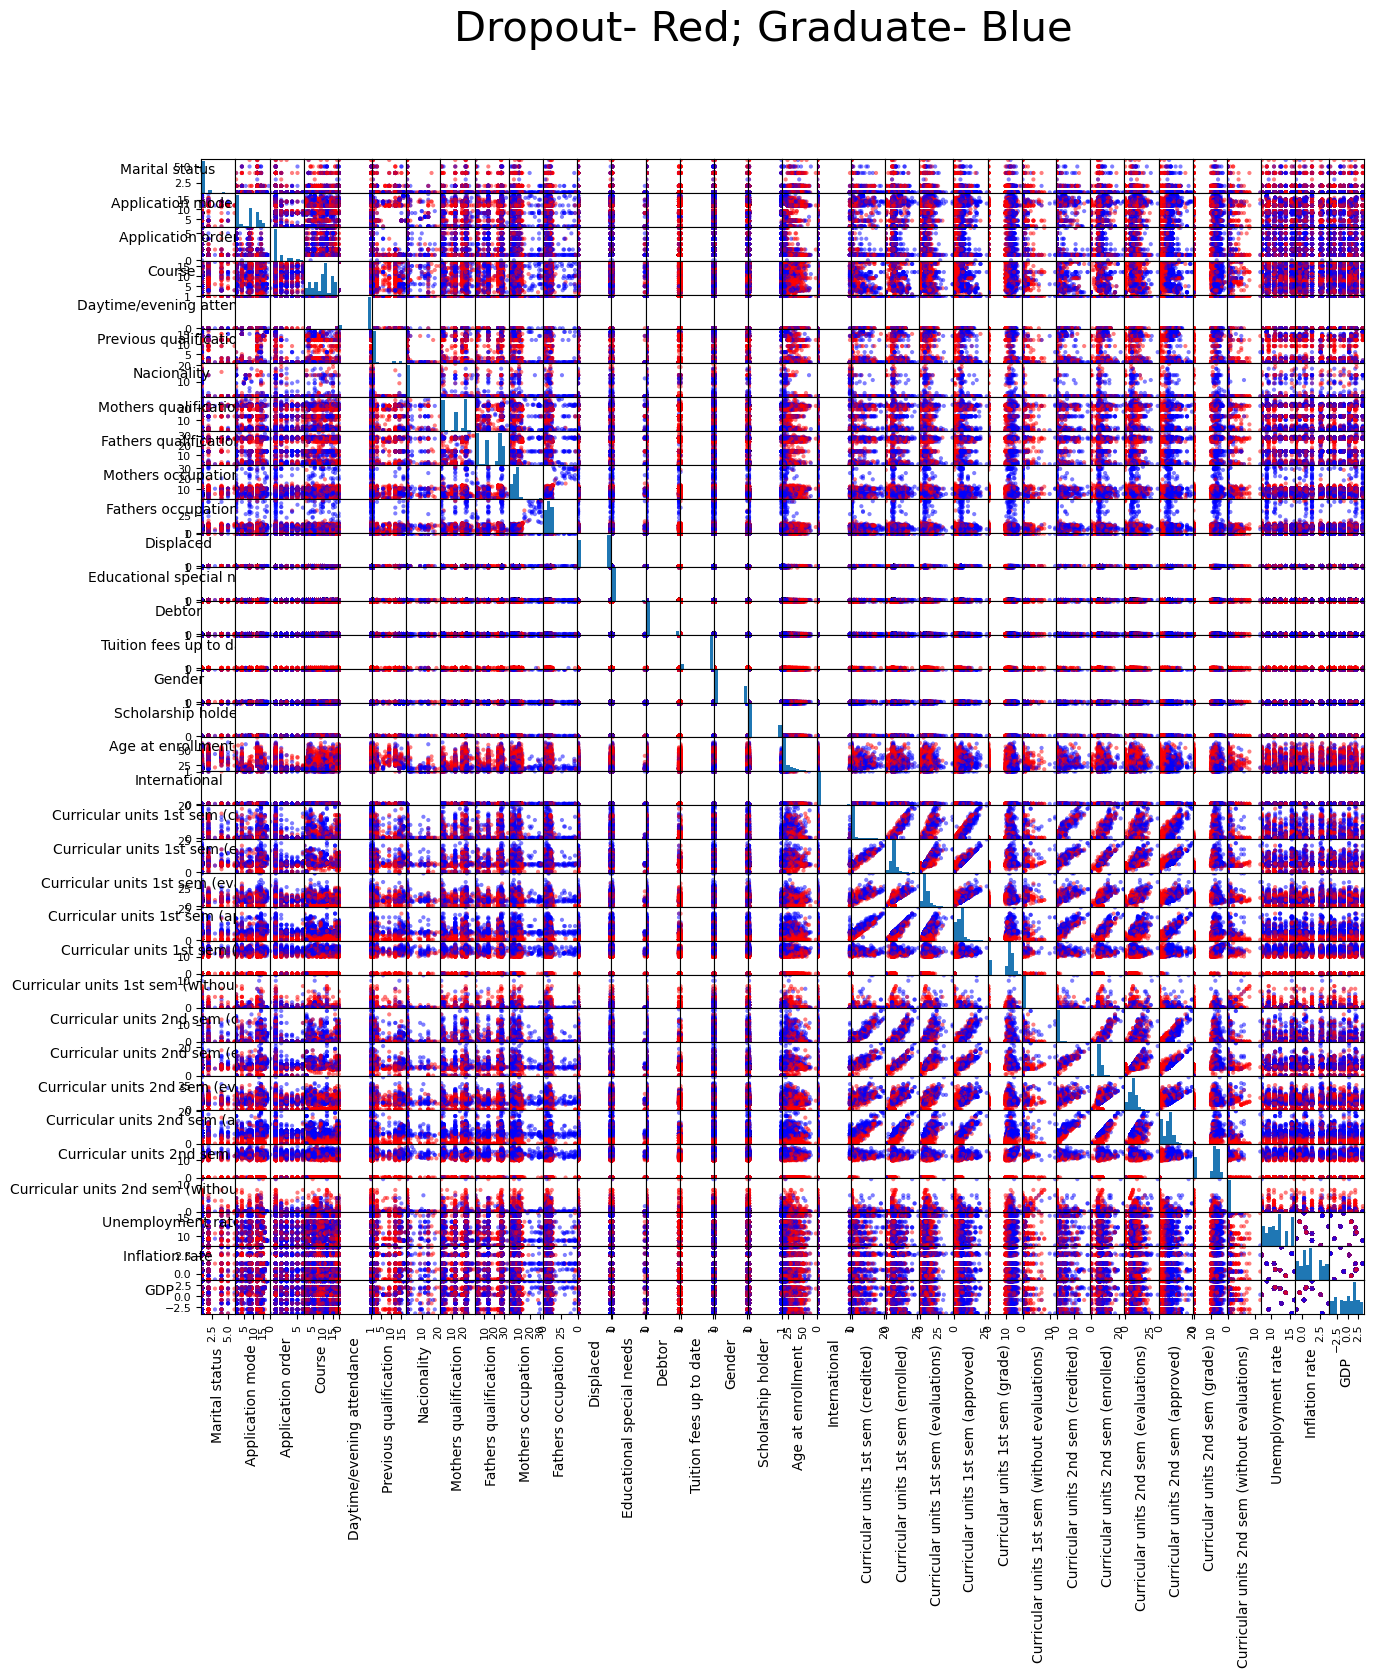

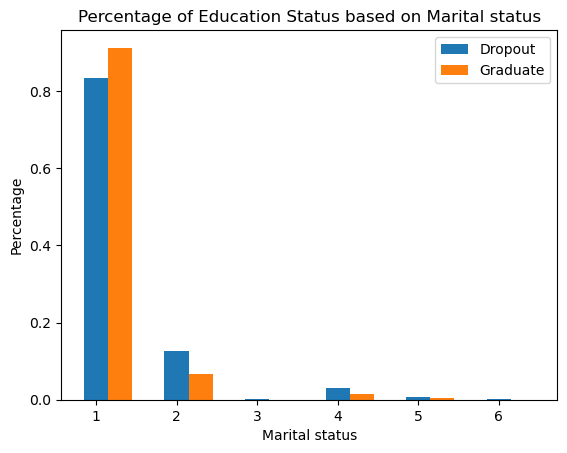

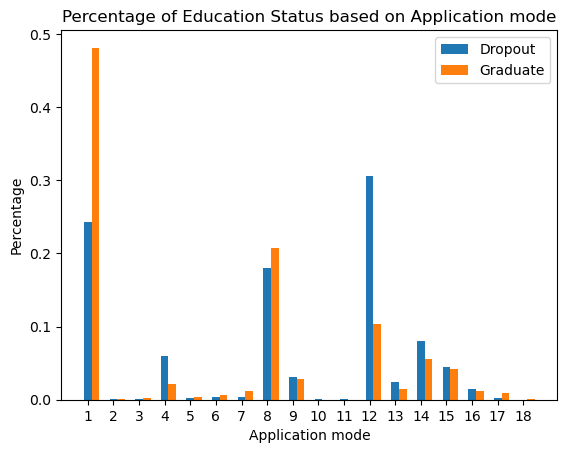

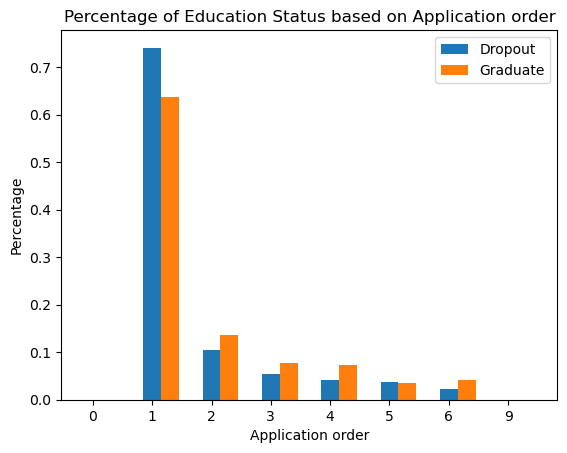

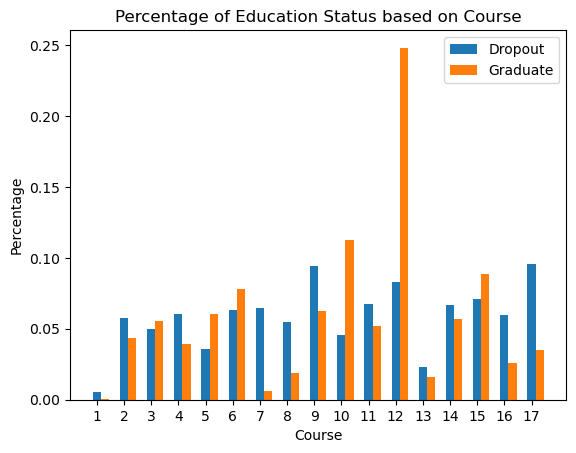

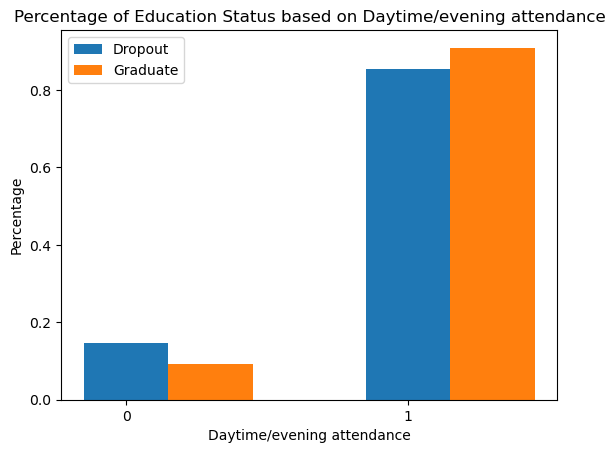

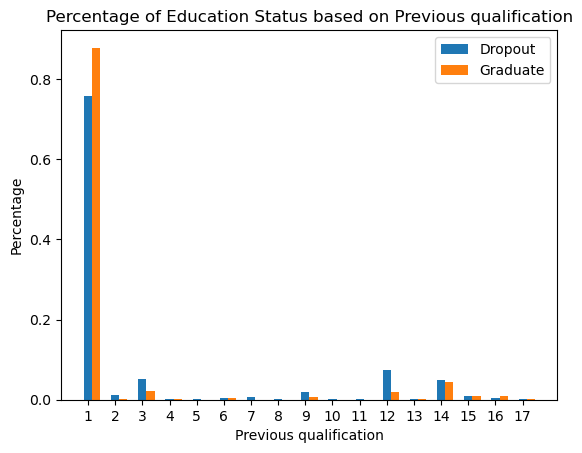

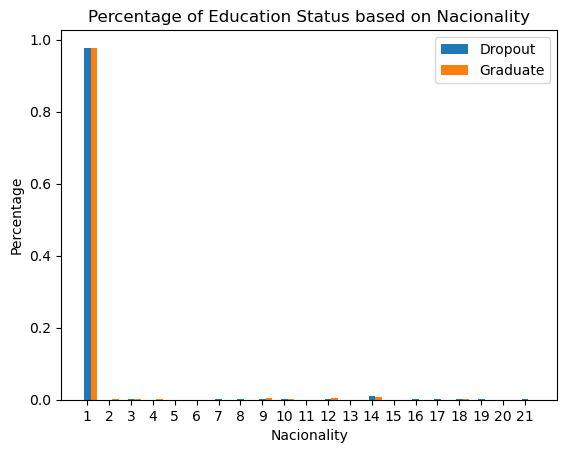

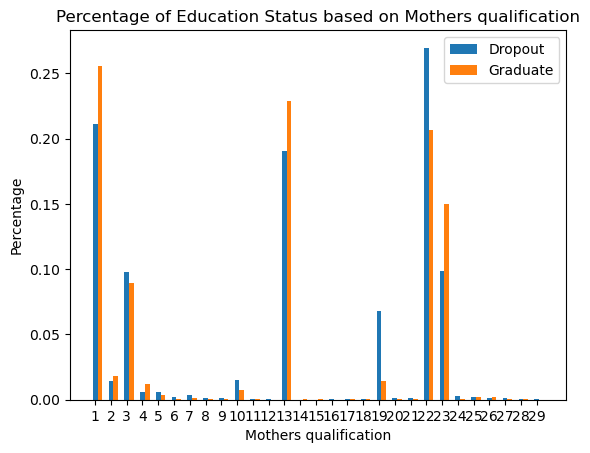

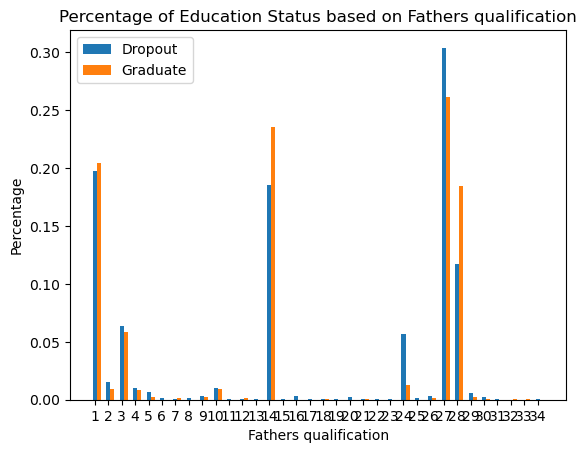

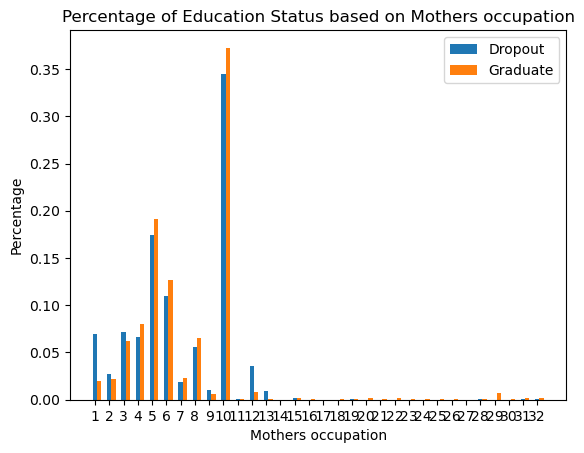

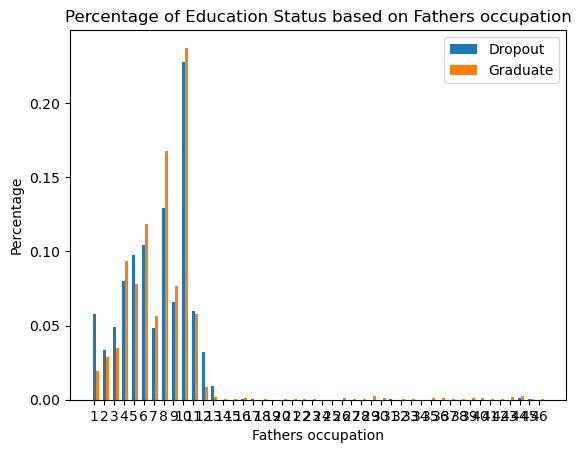

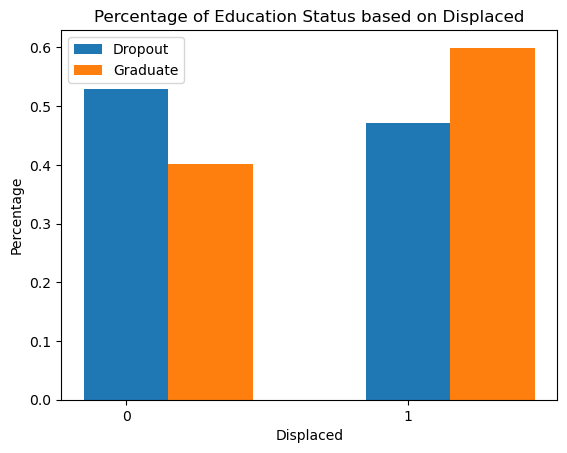

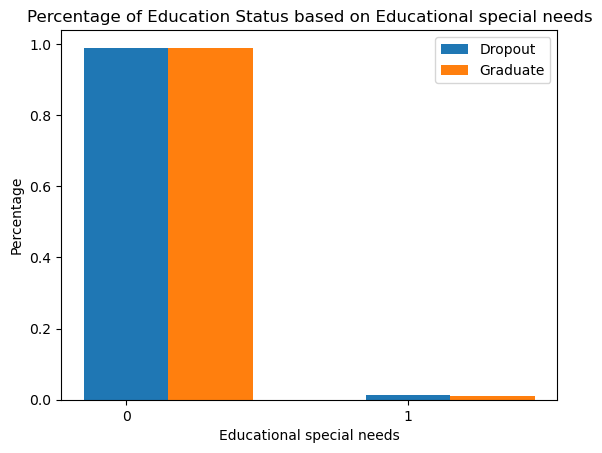

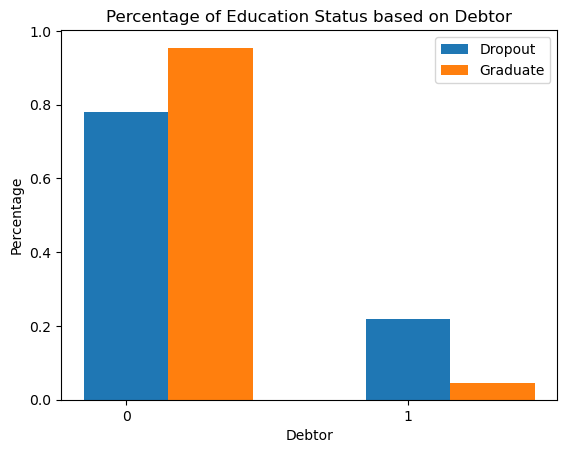

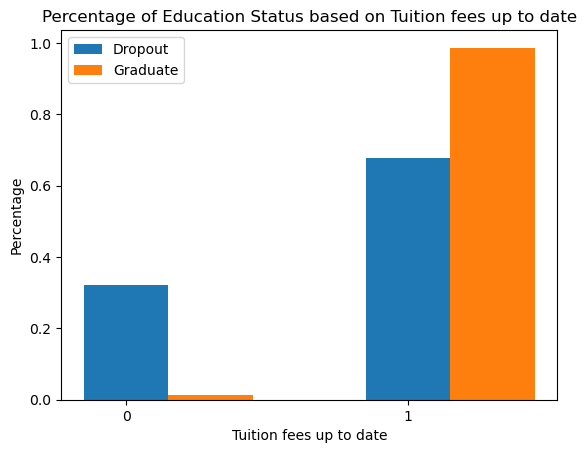

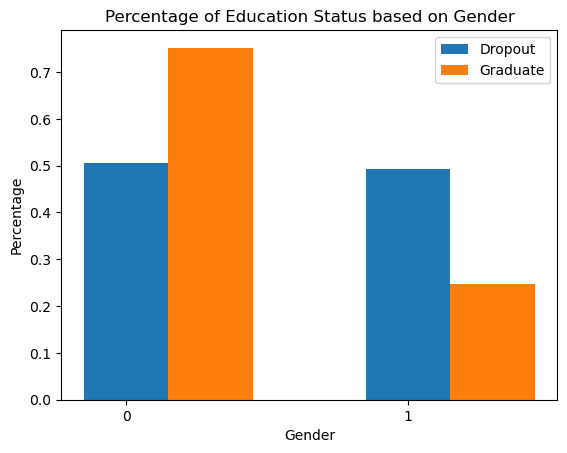

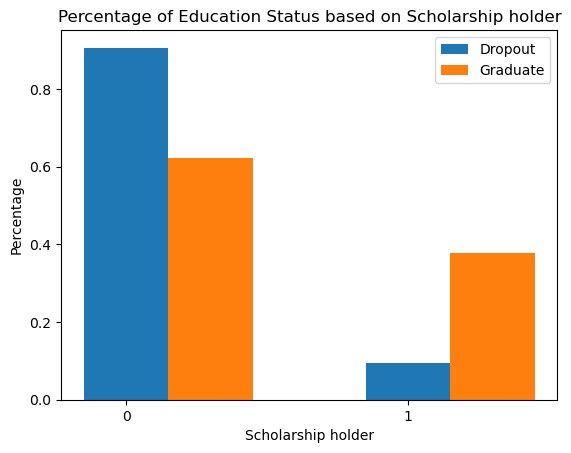

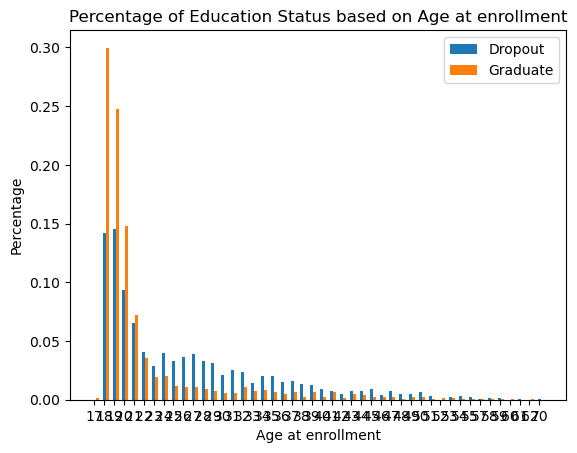

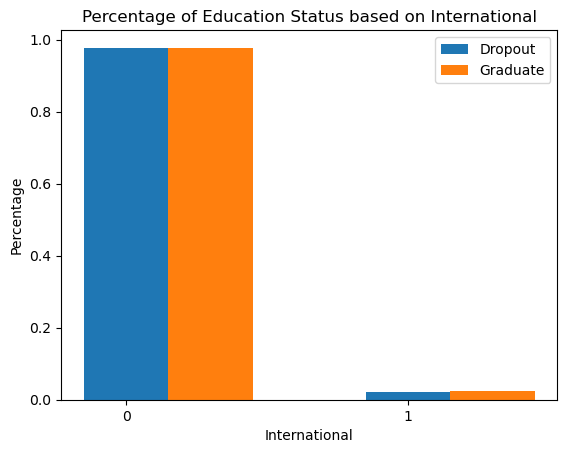

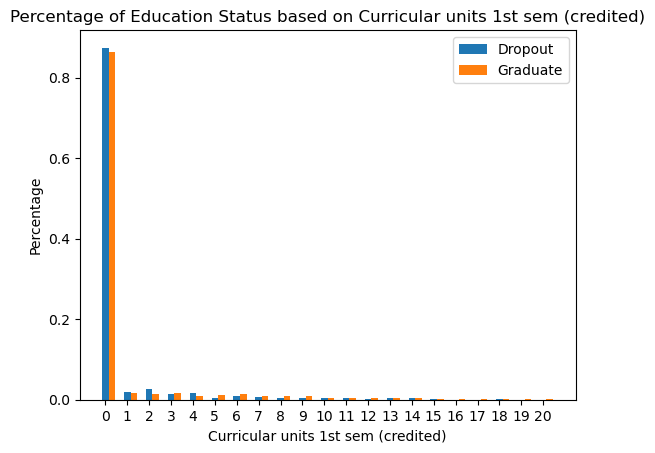

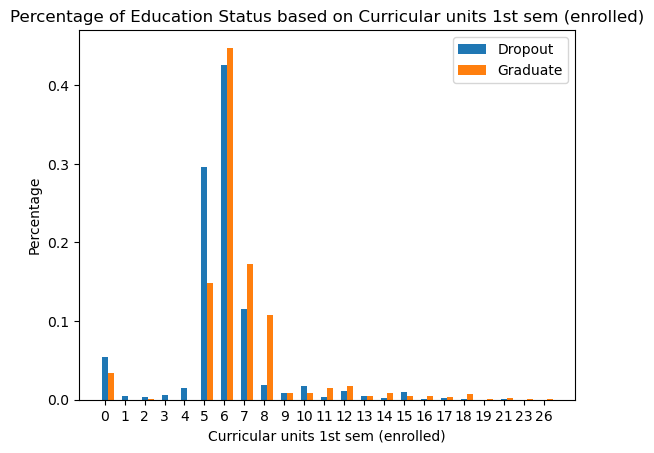

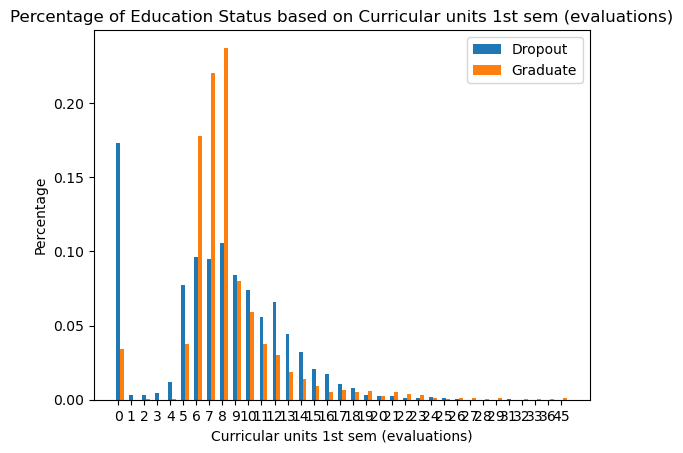

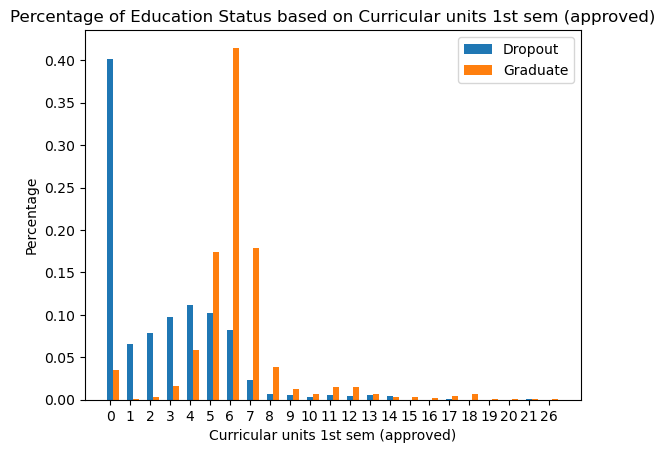

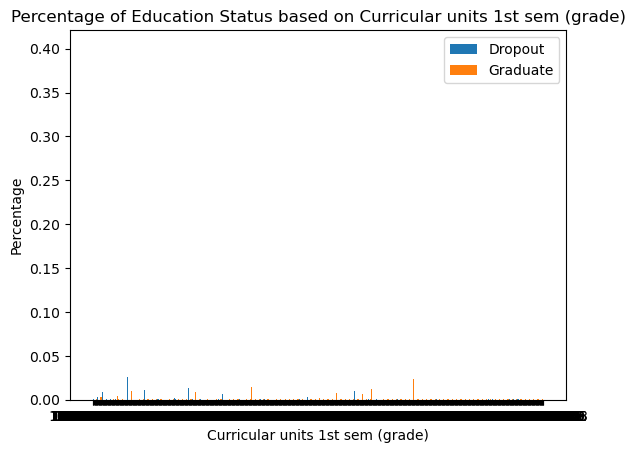

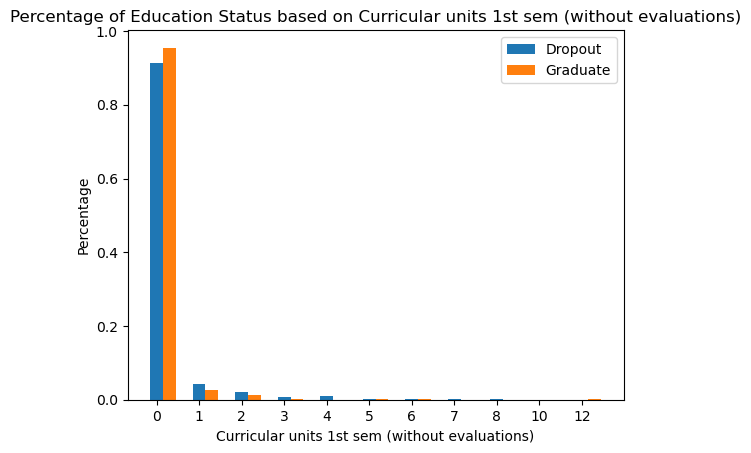

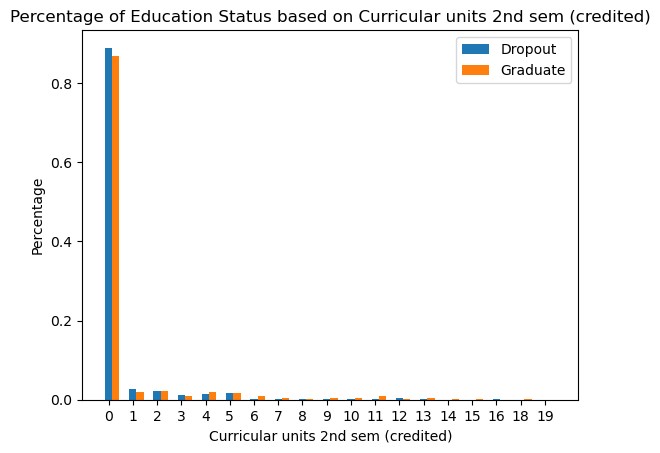

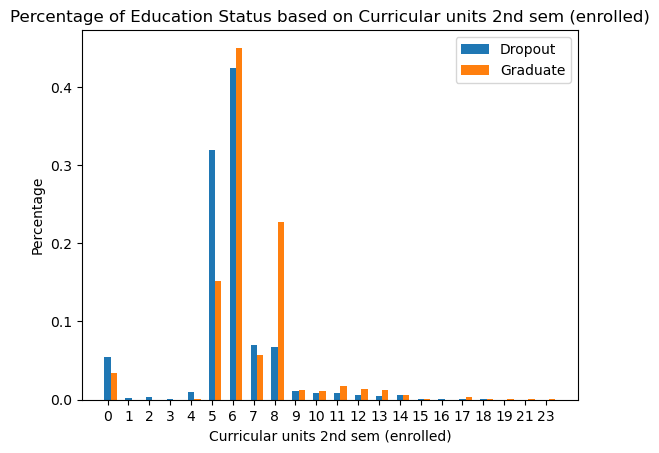

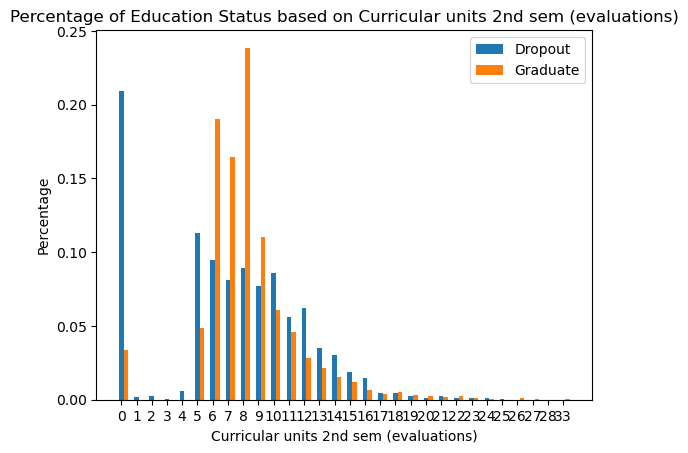

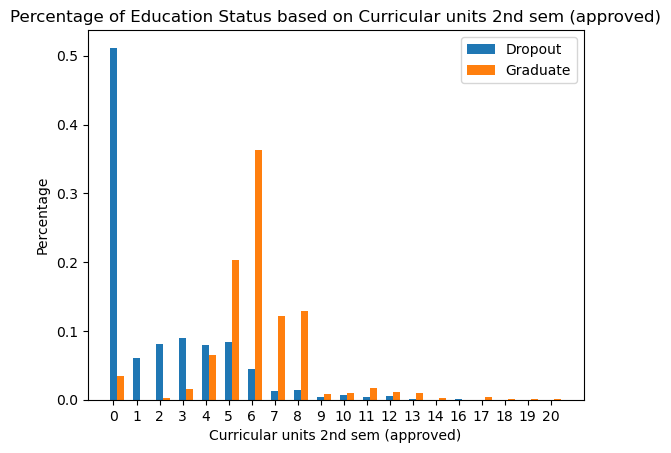

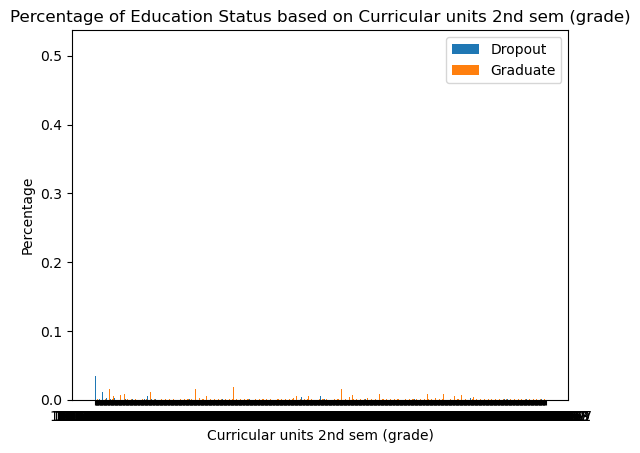

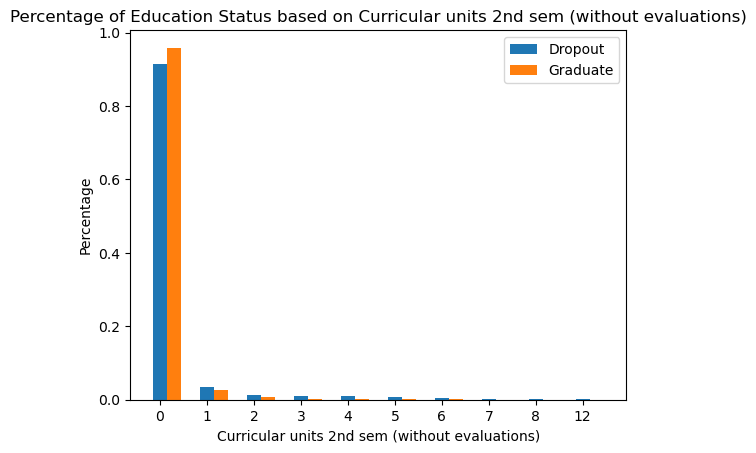

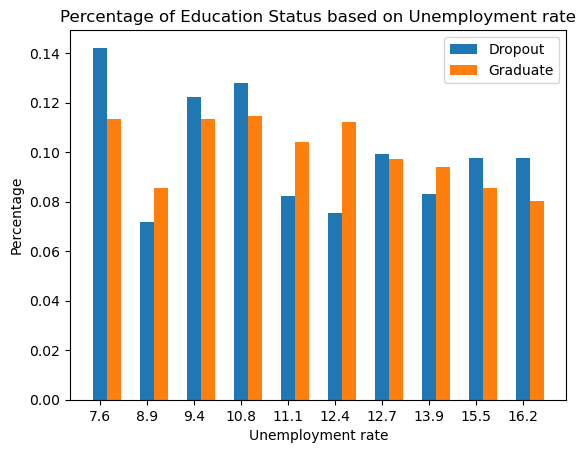

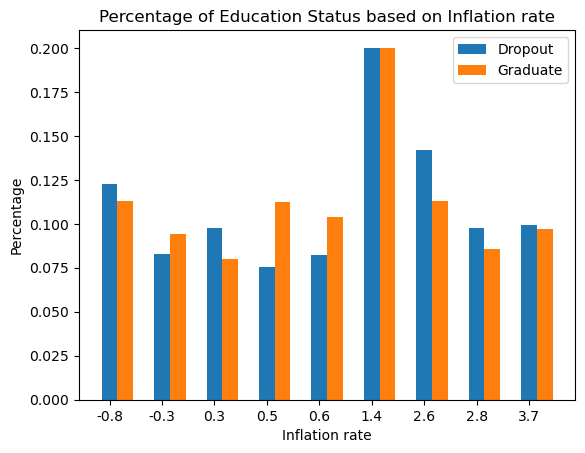

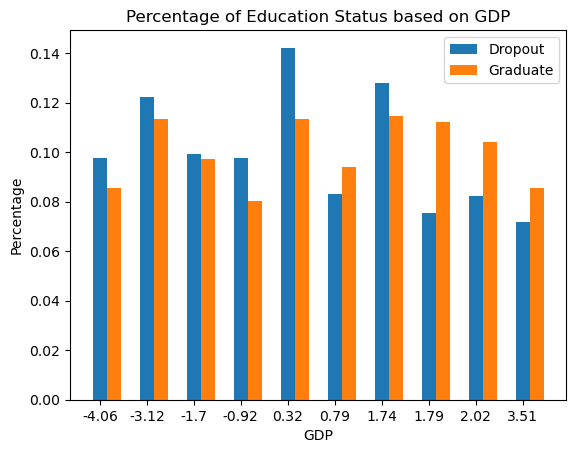

In [20]:
scatterPlot('Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (credited)')
scatterPlot('Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (credited)')
scatterPlot('Curricular units 1st sem (approved)', 'Curricular units 1st sem (credited)')
scatterPlot('Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (approved)')

gradeGraph('Curricular units 1st sem (grade)')
gradeGraph('Curricular units 2nd sem (grade)')

correlations = dfNoEnrolled.corr()
sns.heatmap(correlations)
plt.title("Heat Map to Show Correlations")
plt.show()

status = np.unique(y)
colors = ['r','b']
mapping ={}

for i in range(len(status)):
    mapping[status[i]]= colors[i]
    
color = [mapping[s] for s in y]


scatter_matrix = pd.plotting.scatter_matrix(dftrain, color = color, figsize = (15,15))
for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 10, rotation = 90)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 10, rotation = 0)
plt.suptitle("Dropout- Red; Graduate- Blue", size = 30)
plt.show()

for col in dftrain:
    plotCatorgical(col)
    


# experiment with algorithms, feature sets, parameters, etc.,

In [13]:
xKN =  dftrain.drop(columns = ['Daytime/evening attendance', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date'
                               , 'Gender', 'Scholarship holder', 'International'])
neigh = KNeighborsClassifier(n_neighbors= 5)
yp = cross_val_predict(neigh, xKN, y, cv =10)
acc = accuracy_score(y, yp)
pre = precision_score(y, yp, average = 'macro')
rec = recall_score(y,yp,average = 'macro')
print('K-Nearest Neighors 5 neighbors: ')
print('accuracy = %.2f, precision = %.2f, recall = %.2f' % (acc, pre, rec))
neigh = KNeighborsClassifier(n_neighbors= 10)
yp = cross_val_predict(neigh, xKN, y, cv =10)
acc = accuracy_score(y, yp)
pre = precision_score(y, yp, average = 'macro')
rec = recall_score(y,yp,average = 'macro')
print('K-Nearest Neighors 10 neighbors: ')
print('accuracy = %.2f, precision = %.2f, recall = %.2f' % (acc, pre, rec))
neigh = KNeighborsClassifier(n_neighbors= 3)
yp = cross_val_predict(neigh, xKN, y, cv =10)
acc = accuracy_score(y, yp)
pre = precision_score(y, yp, average = 'macro')
rec = recall_score(y,yp,average = 'macro')
print('K-Nearest Neighors 3 neighbors: ')
print('accuracy = %.2f, precision = %.2f, recall = %.2f' % (acc, pre, rec))

xNB = dftrain.drop(columns = ['Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)' ,
                            'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)',
                             'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)',
                             'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)',
                             'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)',
                             'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 
                             'Unemployment rate','Inflation rate','GDP', 'Mothers qualification', 'Fathers qualification',
                             'Mothers occupation', 'Fathers occupation'])
xNB3 = dftrain[['Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)' ,
                            'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)',
                             'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)',
                             'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)',
                             'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)',
                             'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 
                             'Unemployment rate','Inflation rate','GDP', 'Mothers qualification', 'Fathers qualification',
                             'Mothers occupation', 'Fathers occupation']]
xNB2 =  dftrain[['Debtor','Gender', 'Marital status', 'Displaced', 'Educational special needs',
                'Scholarship holder','Unemployment rate', 'Inflation rate', 'GDP',  'Application mode', 'Application order',
                'Course','Mothers qualification','Fathers qualification', 'Mothers occupation', 'Fathers occupation' ]]
nb = GaussianNB()
yp = cross_val_predict(nb, xNB, y, cv =5)
acc = accuracy_score(y, yp)
pre = precision_score(y, yp, average = 'macro')
rec = recall_score(y,yp,average = 'macro')
print('Naive Bayes Feature Set 1: ')
print('accuracy = %.2f, precision = %.2f, recall = %.2f' % (acc, pre, rec))
yp = cross_val_predict(nb, xNB2, y, cv =5)
acc = accuracy_score(y, yp)
pre = precision_score(y, yp, average = 'macro')
rec = recall_score(y,yp,average = 'macro')
print('Naive Bayes Feature Set 2: ')
print('accuracy = %.2f, precision = %.2f, recall = %.2f' % (acc, pre, rec))
yp = cross_val_predict(nb, xNB3, y, cv =5)
acc = accuracy_score(y, yp)
pre = precision_score(y, yp, average = 'macro')
rec = recall_score(y,yp,average = 'macro')
print('Naive Bayes Feature Set 3: ')
print('accuracy = %.2f, precision = %.2f, recall = %.2f' % (acc, pre, rec))
yp = cross_val_predict(nb, dftrain, y, cv =5)
acc = accuracy_score(y, yp)
pre = precision_score(y, yp, average = 'macro')
rec = recall_score(y,yp,average = 'macro')
print('Naive Bayes Original Feature Set: ')
print('accuracy = %.2f, precision = %.2f, recall = %.2f' % (acc, pre, rec))

xDT = dftrain[['Debtor', 'Tuition fees up to date', 'Scholarship holder', 'Marital status', 'Application mode','Application order',
               'Previous qualification', 'Displaced','Educational special needs',  'Gender']]
xDT1 = dftrain.drop(columns = ['Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)',
                             'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)',
                             'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)',
                             'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 
                             'Unemployment rate','Inflation rate','GDP'])
decTree =  DecisionTreeClassifier()
yp = cross_val_predict(decTree, xDT, y, cv =10)
acc = accuracy_score(y, yp)
pre = precision_score(y, yp, average = 'macro')
rec = recall_score(y,yp,average = 'macro')
print('Decison Tree feature set 1: ')
print('accuracy = %.2f, precision = %.2f, recall = %.2f' % (acc, pre, rec))
yp = cross_val_predict(decTree, xDT1, y, cv =10)
acc = accuracy_score(y, yp)
pre = precision_score(y, yp, average = 'macro')
rec = recall_score(y,yp,average = 'macro')
print('Decison Tree feature set 2:')
print('accuracy = %.2f, precision = %.2f, recall = %.2f' % (acc, pre, rec))
yp = cross_val_predict(decTree, dftrain, y, cv =10)
acc = accuracy_score(y, yp)
pre = precision_score(y, yp, average = 'macro')
rec = recall_score(y,yp,average = 'macro')
print('Decison Tree original feature set:')
print('accuracy = %.2f, precision = %.2f, recall = %.2f' % (acc, pre, rec))

svc = SVC(C = 1, kernel= 'sigmoid', gamma = 'scale')
yp = cross_val_predict(svc, dftrain, y, cv =10)
acc = accuracy_score(y, yp)
pre = precision_score(y, yp, average = 'macro')
rec = recall_score(y,yp,average = 'macro')
print('SVC Sigmoid Kernel: ')
print('accuracy = %.2f, precision = %.2f, recall = %.2f' % (acc, pre, rec))
svc = SVC(C = 1, kernel= 'linear', gamma = 'scale')
yp = cross_val_predict(svc, dftrain, y, cv =10)
acc = accuracy_score(y, yp)
pre = precision_score(y, yp, average = 'macro')
rec = recall_score(y,yp,average = 'macro')
print('SVC Linear Kernel: ')
print('accuracy = %.2f, precision = %.2f, recall = %.2f' % (acc, pre, rec))
svc = SVC(C = 1, kernel= 'poly', gamma = 'scale')
yp = cross_val_predict(svc, dftrain, y, cv =10)
acc = accuracy_score(y, yp)
pre = precision_score(y, yp, average = 'macro')
rec = recall_score(y,yp,average = 'macro')
print('SVC Polynomial Kernel: ')
print('accuracy = %.2f, precision = %.2f, recall = %.2f' % (acc, pre, rec))
svc = SVC(C = 1, kernel= 'rbf', gamma = 'scale')
yp = cross_val_predict(svc, dftrain, y, cv =10)
acc = accuracy_score(y, yp)
pre = precision_score(y, yp, average = 'macro')
rec = recall_score(y,yp,average = 'macro')
print('SVC Radial Basis Function(rbf) Kernel: ')
print('accuracy = %.2f, precision = %.2f, recall = %.2f' % (acc, pre, rec))

K-Nearest Neighors 5 neighbors: 
accuracy = 0.83, precision = 0.85, recall = 0.80
K-Nearest Neighors 10 neighbors: 
accuracy = 0.83, precision = 0.85, recall = 0.80
K-Nearest Neighors 3 neighbors: 
accuracy = 0.83, precision = 0.83, recall = 0.80
Naive Bayes Feature Set 1: 
accuracy = 0.72, precision = 0.70, recall = 0.68
Naive Bayes Feature Set 2: 
accuracy = 0.71, precision = 0.70, recall = 0.69
Naive Bayes Feature Set 3: 
accuracy = 0.82, precision = 0.84, recall = 0.78
Naive Bayes Original Feature Set: 
accuracy = 0.84, precision = 0.84, recall = 0.83
Decison Tree feature set 1: 
accuracy = 0.75, precision = 0.74, recall = 0.72
Decison Tree feature set 2:
accuracy = 0.71, precision = 0.69, recall = 0.69
Decison Tree original feature set:
accuracy = 0.86, precision = 0.85, recall = 0.85
SVC Sigmoid Kernel: 
accuracy = 0.70, precision = 0.68, recall = 0.68
SVC Linear Kernel: 
accuracy = 0.91, precision = 0.92, recall = 0.90
SVC Polynomial Kernel: 
accuracy = 0.90, precision = 0.90, r

# visualize experimental results

In [14]:
neigh = KNeighborsClassifier(n_neighbors= 5)
yp = cross_val_predict(neigh, xKN, y, cv =10)
acc = accuracy_score(y, yp)
pre = precision_score(y, yp, average = 'macro')
rec = recall_score(y,yp,average = 'macro')
print('K-Nearest Neighors 5 neighbors: ')
print('accuracy = %.2f, precision = %.2f, recall = %.2f' % (acc, pre, rec))

yp = cross_val_predict(nb, dftrain, y, cv =5)
acc = accuracy_score(y, yp)
pre = precision_score(y, yp, average = 'macro')
rec = recall_score(y,yp,average = 'macro')
print('Naive Bayes Original Feature Set: ')
print('accuracy = %.2f, precision = %.2f, recall = %.2f' % (acc, pre, rec))

yp = cross_val_predict(decTree, dftrain, y, cv =10)
acc = accuracy_score(y, yp)
pre = precision_score(y, yp, average = 'macro')
rec = recall_score(y,yp,average = 'macro')
print('Decison Tree original feature set:')
print('accuracy = %.2f, precision = %.2f, recall = %.2f' % (acc, pre, rec))

svc = SVC(C = 1, kernel= 'linear', gamma = 'scale')
yp = cross_val_predict(svc, dftrain, y, cv =10)
acc = accuracy_score(y, yp)
pre = precision_score(y, yp, average = 'macro')
rec = recall_score(y,yp,average = 'macro')
print('SVC Linear Kernel: ')
print('accuracy = %.2f, precision = %.2f, recall = %.2f' % (acc, pre, rec))

K-Nearest Neighors 5 neighbors: 
accuracy = 0.83, precision = 0.85, recall = 0.80
Naive Bayes Original Feature Set: 
accuracy = 0.84, precision = 0.84, recall = 0.83
Decison Tree original feature set:
accuracy = 0.86, precision = 0.85, recall = 0.85
SVC Linear Kernel: 
accuracy = 0.91, precision = 0.92, recall = 0.90


# analyze / explain experimental results

K-nearest neighbors: 
Looking at the Scatter matrix it was obvious that some features didn’t do any clustering, so I removed those from the feature set and got a pretty good accuracy, precision, and recall score. I chose to try KNN because this is a classification problem and KNN can be good with classification problems. I also played with the number of neighbors (K) and found that it didn’t influence the accuracy, precision or recall. 
Naïve Bayes:
I tried many different feature sets with this model to try and get a better prediction. The biggest thing with Naïve Bayes is that all the features must be conditionally independent so after calculating the correlation between features and plotting the heat map I created a set of features that had the least amount of correlation with each other. However, this new feature set performed worse than just having all the features. My best prediction came when I gave the model all the features. I think this is because none of the features were highly correlated to being with, so they didn’t have a huge effect on the model. 
Decision Tree:
I also tried a variety of feature sets on the Decision Tree. I narrowed them down by choosing features that were categorical and binary because that’s what works best with decision trees. Then just tried dropping the crazy columns that didn’t have a straightforward answer. This turned out the same as the same as the Naïve Bayes, in that the feature set that gave the best predictions was the original feature set. Decision trees tend to overfit, but I couldn’t seem to get my model to over fit my data. I think that I didn’t have enough binary features that strongly correlated to the final classification, so a decision tree was not effective in predicting my data. I calculated the correlation between all the features and the classification and none of them were very high which is not good when trying to use a decision tree.  
Support Vector Machine:
It works well in high dimensional data which is nice when this is relatively high dimensional data. Especially when looking at something like KNN where it didn’t seem like the data was clustering a support vector machine can find those clusters in multiple dimensions easier than KNN which struggles with the curse of dimensionality. I experimented with many different kernels to find the one that best predicted the data. Linear ended up being the best with good accuracy, precision, and recall. I set the C value to 1 so that there was some slack but not a whole lot.  


# conclusion 

Overall, the model that was best at predicting the data was a Support Vector Machine. The goal was to predict whether a student would drop out or graduate and using a SVM that goal was accomplished. I think this was because it does well in high dimension data and is a good model for classification problems because it draws decision boundaries with hyperplanes. I originally thought that a decision tree would work best for this data set because it’s good at classification problems, but I think the features had too many answers options for a decision tree to work the best. However, the SVM takes the most time to run and the second-best option would be the Decision Tree. 